In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import model_selection
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
mush = pd.read_csv('Repositories/ml_practices_2018/Labs/Lab1/Heenal/Data/mushroom_new.csv')

In [5]:
mush.shape

(8124, 23)

In [23]:
x = mush.drop(['class'], axis=1).values
y = mush['class'].values

In [25]:
type(x)

numpy.ndarray

In [38]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
x_train

array([[2, 0, 2, ..., 2, 5, 0],
       [5, 0, 3, ..., 2, 4, 0],
       [5, 0, 2, ..., 3, 5, 0],
       ...,
       [2, 3, 4, ..., 3, 5, 4],
       [3, 2, 2, ..., 7, 4, 4],
       [3, 0, 3, ..., 7, 2, 1]])

In [40]:
# defining the layers of the model
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(6, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(5, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(3, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [41]:
# compiling

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
ckpt_model = 'mushroom-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [52]:
print('Starting training...')
# train the model, store the results for plotting
history = model1.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    validation_split = 0.2,
                    epochs=100,
                    verbose=0)

Starting training...

Epoch 00001: val_acc did not improve from 0.95188

Epoch 00002: val_acc improved from 0.95188 to 0.96195, saving model to mushroom-weights.best.hdf5

Epoch 00003: val_acc improved from 0.96195 to 0.98172, saving model to mushroom-weights.best.hdf5

Epoch 00004: val_acc improved from 0.98172 to 0.98769, saving model to mushroom-weights.best.hdf5

Epoch 00005: val_acc improved from 0.98769 to 0.99105, saving model to mushroom-weights.best.hdf5

Epoch 00006: val_acc improved from 0.99105 to 0.99478, saving model to mushroom-weights.best.hdf5

Epoch 00007: val_acc improved from 0.99478 to 0.99590, saving model to mushroom-weights.best.hdf5

Epoch 00008: val_acc improved from 0.99590 to 0.99627, saving model to mushroom-weights.best.hdf5

Epoch 00009: val_acc improved from 0.99627 to 0.99739, saving model to mushroom-weights.best.hdf5

Epoch 00010: val_acc improved from 0.99739 to 0.99776, saving model to mushroom-weights.best.hdf5

Epoch 00011: val_acc did not improve

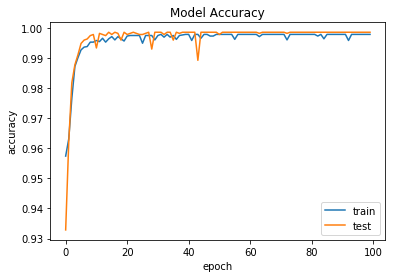

In [53]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

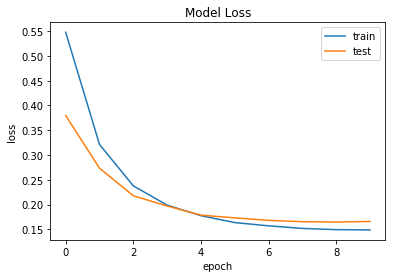

In [51]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [37]:
model1.fit(x_train,y_train,epochs=10)

Epoch 1/10
5443/5443 [==============================] - 0s 43us/step - loss: 0.0143 - acc: 0.9978
Epoch 2/10
5443/5443 [==============================] - 0s 36us/step - loss: 0.0143 - acc: 0.9978
Epoch 3/10
5443/5443 [==============================] - 0s 36us/step - loss: 0.0143 - acc: 0.9978
Epoch 4/10
5443/5443 [==============================] - 0s 37us/step - loss: 0.0143 - acc: 0.9978
Epoch 5/10
5443/5443 [==============================] - 0s 40us/step - loss: 0.0143 - acc: 0.9978
Epoch 6/10
5443/5443 [==============================] - 0s 39us/step - loss: 0.0143 - acc: 0.9978
Epoch 7/10
5443/5443 [==============================] - 0s 37us/step - loss: 0.0143 - acc: 0.9978
Epoch 8/10
5443/5443 [==============================] - 0s 42us/step - loss: 0.0143 - acc: 0.9978
Epoch 9/10
5443/5443 [==============================] - 0s 39us/step - loss: 0.0143 - acc: 0.9978
Epoch 10/10
5443/5443 [==============================] - 0s 40us/step - loss: 0.0143 - acc: 0.9978


In [35]:
val_loss, val_acc = model1.evaluate(x_test, y_test)
print(val_loss, val_acc)

2681/2681 [==============================] - 0s 50us/step
0.2231195115389463 0.9395747854833236
